# Ontologize

In [1]:
import NotebookImport
from Imports import *

importing IPython notebook from Imports

In [2]:
import seaborn as sns
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)

In [4]:
from IPython.display import display_svg
import pygraphviz as pgv

CLIXO = '/cellar/users/agross/sources/clixo_release_0.2/clixo'

def run_clixo(df, tmp_file='./tmp.tab', alpha=.01, beta=.5, node_name='cancer'):
    stacked = df.corr().stack()
    stacked.index.names = ['l1','l2']
    stacked = stacked.reset_index()
    stacked.to_csv(tmp_file, header=False, sep='\t',
                   index=None)
    call = ' '.join([CLIXO, tmp_file, str(alpha), str(beta),'cancer'])
    result = !$call
    result = pd.DataFrame([r.split('\t') for r in result if r.startswith('#') == False],
                          columns=['node','cancer','type','distance'])
    os.remove(tmp_file)
    return result

def show_ontology(ontology, figsize=(20,20)):
    G=pgv.AGraph(name='test', directed=True)
    for i,edge in ontology.iterrows():
        G.add_edge(edge.node, edge.cancer, weight=1. / float(edge.distance),
                   arrowhead='vee')
        e = G.get_edge(edge.node, edge.cancer)
    for n in G.nodes():
        n.attr['label'] = n.name
        n.attr['style'] = 'rounded'
        n.attr['lwidth'] = .2

        if len(n.name) >= 3:
            n.attr['color'] = 'red'

    G.graph_attr['size'] = '{}, {}'.format(*figsize)
    svg = G.draw(format='svg', prog='dot')
    return display_svg(svg, raw=True)

In [5]:
hpv = pd.read_csv('/cellar/users/agross/Desktop/hpv.csv', index_col=0, squeeze=True,
                  header=None)
hpv = hpv.map({True: 'HNSC HPV+', False: 'HNSC HPV-'})
c2 = hpv.combine_first(codes)

Infer normal data for patients with missing values.

In [6]:
cancers = codes.ix[matched_tn.columns.get_level_values(0)].unique()
cancers_to_use = ti(codes.ix[matched_tn.columns.get_level_values(0)].value_counts() > 15)

tn_inf = [infer_normal_knn(rna_df.ix[:, ti(codes == c)], r_curtoff=.3, k=5)
          for c in cancers_to_use]
tn_inf = pd.concat(tn_inf, axis=1)

In [7]:
t = tn_inf.xs('01',1,1)
n = tn_inf.xs('11',1,1)
#t = t.ix[ti(tab_inf.num_dx > 3000)]
t,n = t.align(n, join='inner')
dd = t
#dd = dd.div(n.std(1), axis=0)
#dd = (-1 * (dd < -1)) + (1 * (dd > 1))
#dd = dd[(dd == 0).mean(1) < .5]

In [8]:
rna_df

TCGA-OR-A5J1  TCGA-OR-A5J2  TCGA-OR-A5J3  TCGA-OR-A5J5  TCGA-OR-A5J6  TCGA-OR-A5J7  TCGA-OR-A5J8  TCGA-OR-A5J9  TCGA-OR-A5JA  TCGA-OR-A5JB      ...       TCGA-KO-8408  TCGA-KO-8409  TCGA-KO-8410  TCGA-KO-8411  TCGA-KO-8413  TCGA-KO-8414  TCGA-KO-8415         TCGA-KO-8416  TCGA-KO-8417
                     01            01            01            01            01            01            01            01            01            01      ...                 01            01            01            01            01            01            01     11            01            01
?                  0.77          0.52          0.78          0.91          0.24          0.22          0.58          0.27          0.70          0.25      ...               1.07          1.37          1.20          1.10          1.61          1.14          1.26   1.38          1.19          0.58
A1BG               4.03          3.26          4.37         10.73          9.23          3.44          5.66          3.02          5.71          7.58      ...               4.41          4.11          5.57          3.47          4.51          6.04          4.06   5.37          5.02          2.59
A1CF              -3.00         -3.00         -0.76          0.63         -3.00         -3.00         -3.00         -3.00         -3.00         -3.00      ...              -3.00         -3.00         -3.00         -3.00         -3.00         -1.30         -3.00   5.97         -0.93         -3.00
A2BP1              4.11          2.49          3.15          2.63          2.16          1.68         -3.00          5.06          2.78         -3.00      ...               0.68         -3.00          2.92          4.05          1.42          1.70         -3.00   4.40          1.07          4.95
A2LD1              7.51          7.90          7.12          6.00          7.89          6.48          5.73          8.10          8.07          5.54      ...               5.28          5.62          6.95          5.61          4.29          4.86          5.53   9.84          4.59          4.80
A2M               13.34         13.27         12.81         11.52         13.23         13.36         14.88         13.79         12.87         11.69      ...              13.13         12.50         12.76         12.82         13.82         12.54         12.68  13.64         12.91         12.51
A2ML1              5.77         -3.00          0.83          5.63          0.16          1.49          2.19          4.87          5.06         -3.00      ...              -3.00         -3.00         -3.00         -3.00         -3.00         -0.30         -3.00  -0.12         -3.00         -3.00
A4GALT             7.58          7.64          6.23          8.55         10.60          7.47         10.29          8.61          9.26         11.61      ...               7.74         10.91         10.22          6.63         10.95          9.63          8.80   9.45          9.69          9.12
A4GNT             -3.00         -3.00          1.24         -0.37         -0.84         -3.00         -3.00         -3.00         -3.00         -1.17      ...              -3.00         -3.00         -3.00         -3.00         -3.00         -3.00         -3.00   2.34         -3.00         -3.00
AAA1              -3.00         -3.00         -3.00         -3.00         -3.00         -3.00         -3.00         -3.00         -3.00         -3.00      ...              -3.00         -3.00         -0.47         -3.00         -3.00         -3.00         -3.00   1.46         -3.00         -1.50
AAAS              11.12         10.56         10.30         11.55         10.21         11.14         10.26         10.59         11.29          9.52      ...               9.91         10.21          9.16          9.81          9.46         10.31          9.82   9.29         10.10         10.14
AACS              10.31          9.94         12.34          9.92         10.53         12.38          9.07         11.30         11.20         10.13 

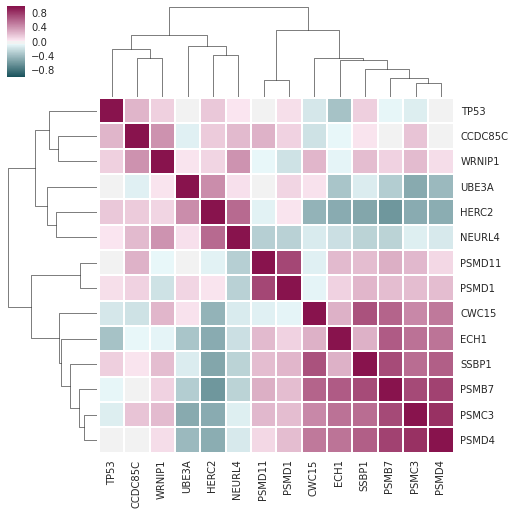

In [9]:
nn = rna_df.xs('11',1,1)
d2 = nn.ix[[u'CCDC85C', u'PSMD11', u'ECI2', u'HERC2', u'TP53', u'PSMC3', u'PSMD4', u'SSBP1', u'UBE3A', u'ECH1', u'NEURL4', u'WRNIP1', u'PSMB7', u'PSMD1', u'CWC15']]
d2 = d2.T.dropna(1).corr()
sns.clustermap(d2,  
               method="average", figsize=(8, 8), 
               cmap=cmap)

In [10]:
genes = [u'CUL2', u'CBFB', u'TCEB1', u'TCEB2', u'HUWE1', u'SLC15A4', u'CUL5']

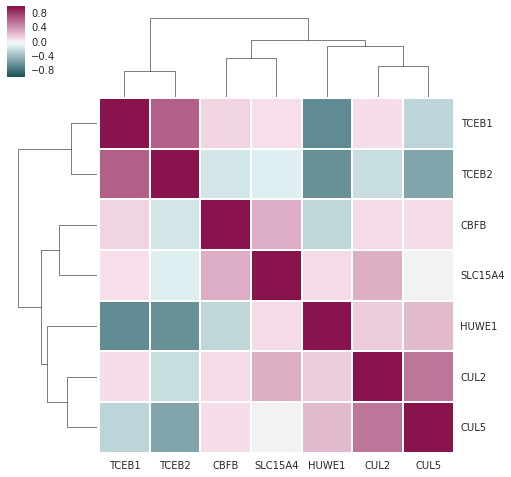

In [11]:
nn = rna_df.xs('11',1,1)
d2 = nn.ix[genes]
c = pd.concat({i: c.corr() for i,c in d2.T.groupby(codes)})
c = c.stack().groupby(level=[1,2]).mean().unstack()
sns.clustermap(c, method="average", figsize=(8, 8), 
               cmap=cmap)

In [12]:
p53 = pd.read_csv('/cellar/users/agross/TCGA_Code/TCGA/Extra_Data/p53_calls_pancancer.csv',
                  header=None, squeeze=True, index_col=0)

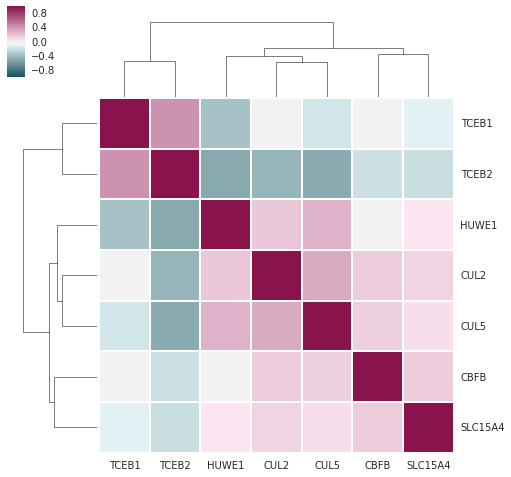

In [13]:
nn = rna_df.xs('01',1,1)
d2 = nn.ix[genes]
c = pd.concat({i: c.corr() for i,c in d2.T.groupby(codes)})
c = c.stack().groupby(level=[1,2]).mean().unstack()
sns.clustermap(c, method="average", figsize=(8, 8), 
               cmap=cmap)

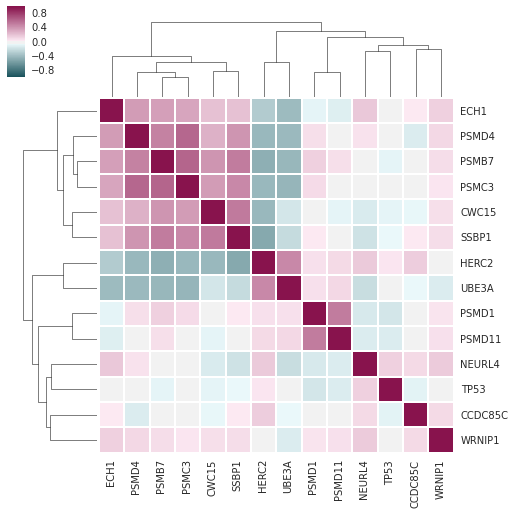

In [14]:
nn = rna_df.xs('01',1,1).ix[:, ti(p53 == False)]
d2 = nn.ix[[u'CCDC85C', u'PSMD11', u'ECI2', u'HERC2', u'TP53', u'PSMC3', u'PSMD4', 
            u'SSBP1', u'UBE3A', u'ECH1', u'NEURL4', u'WRNIP1', u'PSMB7', u'PSMD1', 
            u'CWC15']]
c = pd.concat({i: c.corr() for i,c in d2.T.groupby(codes)})
c = c.stack().groupby(level=[1,2]).mean().unstack()
sns.clustermap(c, method="average", figsize=(8, 8), 
               cmap=cmap)

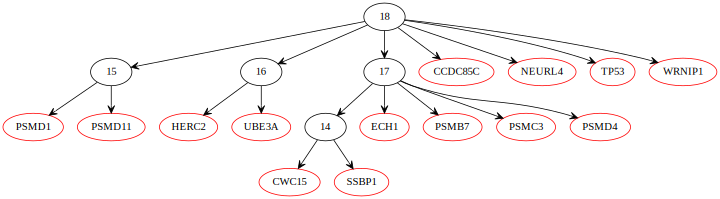

In [15]:
ontology = run_clixo(c, alpha=.02)
show_ontology(ontology, figsize=(10,10))

In [16]:
cc = (dd).T.groupby(c2).mean().T
cc.columns.name = ''

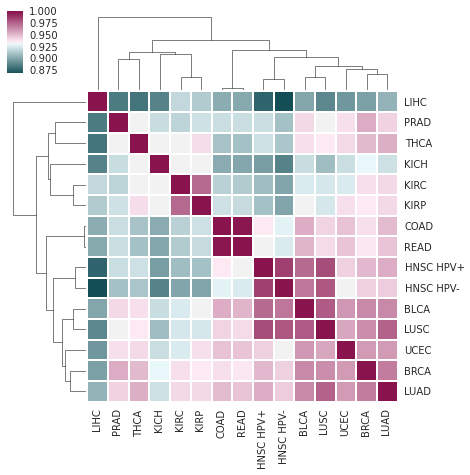

In [17]:
sns.clustermap(cc.corr(),  method="average", figsize=(7, 7), 
               cmap=cmap)

Need to replace system call (!) with subprocess... but seems to break for some reason.

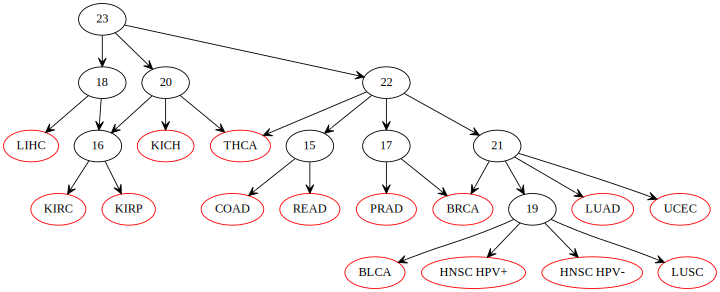

In [18]:
ontology = run_clixo(cc.corr(), alpha=.03, beta=.5)
show_ontology(ontology, figsize=(10,10))

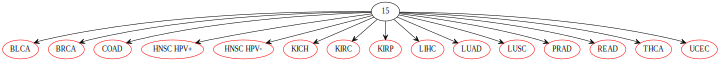

In [19]:
ontology = run_clixo(cc, alpha=.03)
show_ontology(ontology, figsize=(10,10))